In [0]:
import numpy as numpy
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [49]:
!pip install pycountry

In [0]:
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [51]:
!pip install pywaffle

In [0]:
from pywaffle import Waffle

In [53]:
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
plt.style.use("fivethirtyeight")

In [0]:
plt.rcParams['figure.figsize'] = 8, 5

In [55]:
df1 = pd.read_csv("Covid cases in India.csv")
df1.head(5)

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Deaths
0,1,Andhra Pradesh,7,0,0,0
1,2,Bihar,2,0,0,1
2,3,Chattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,29,0,0,1


In [56]:
df2 = pd.read_csv("Indian Coordinates.csv")
df2.head(5)

,Name of State / UT,Latitude,Longitude,Unnamed: 3
0,Andaman And Nicobar,11.667026,92.735983,NaN
1,Andhra Pradesh,14.750429,78.570026,NaN
2,Arunachal Pradesh,27.100399,93.616601,NaN
3,Assam,26.749981,94.216667,NaN
4,Bihar,25.785414,87.479973,NaN


In [57]:
df3 = pd.read_excel("per_day_cases.xlsx")
df3.head(5)

,Date,Total Cases,New Cases,Active,Recovered,Deaths,Days after surpassing 100 cases
0,2020-01-30,1,1,1,0,0,NaN
1,2020-01-31,1,0,1,0,0,NaN
2,2020-02-01,1,0,1,0,0,NaN
3,2020-02-02,2,1,2,0,0,NaN
4,2020-02-03,3,1,3,0,0,NaN


In [58]:
df1.drop(['S. No.'],axis=1,inplace=True)
df1['Total cases'] = df1['Total Confirmed cases (Indian National)'] + df1['Total Confirmed cases ( Foreign National )'] 
df1['Active cases'] = df1['Total cases'] - (df1['Cured/Discharged/Migrated'] + df1['Deaths'])
print(f'Total number of Confirmed COVID 2019 cases across India:', df1['Total cases'].sum())
print(f'Total number of Active COVID 2019 cases across India:', df1['Active cases'].sum())
print(f'Total number of Cured/Discharged/Migrated COVID 2019 cases across India:', df1['Cured/Discharged/Migrated'].sum())
print(f'Total number of Deaths due to COVID 2019  across India:', df1['Deaths'].sum())
print(f'Total number of States/UTs affected:', len(df1['Name of State / UT']))

Total number of Confirmed COVID 2019 cases across India: 492
Total number of Active COVID 2019 cases across India: 446
Total number of Cured/Discharged/Migrated COVID 2019 cases across India: 37
Total number of Deaths due to COVID 2019  across India: 9
Total number of States/UTs affected: 23


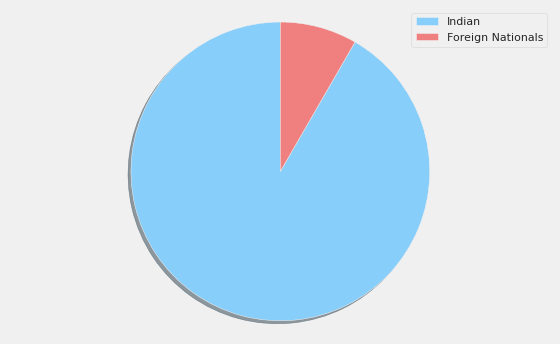

In [59]:
import matplotlib.pyplot as plt

indian = df1['Total Confirmed cases (Indian National)'].sum()
foreign = df1['Total Confirmed cases ( Foreign National )'].sum()
labels = ['Indian','Foreign Nationals']
sizes = [indian, foreign]
colors = ['lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()


In [60]:
fig = px.bar(df1.sort_values('Active cases', ascending=False).sort_values('Active cases', ascending=True), 
             x="Active cases", y="Name of State / UT", 
             title='Total Active Cases', 
             text='Active cases', 
             orientation='h', 
             width=1000, height=700, range_x = [0, max(df1['Active cases'])])
fig.update_traces(marker_color='#46cdcf', opacity=0.8, textposition='inside')

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [61]:
x = df1.groupby('Name of State / UT')['Active cases'].sum().sort_values(ascending=False).to_frame()
x.style.background_gradient(cmap='Reds')

,Active cases
Name of State / UT,
Kerala,90
Maharashtra,85
Karnataka,34
Telengana,32
Rajasthan,30
Gujarat,28
Uttar Pradesh,24
Delhi,24
Punjab,20


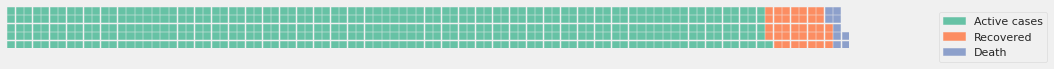

In [62]:
df1_condensed = pd.DataFrame([df1['Active cases'].sum(),df1['Cured/Discharged/Migrated'].sum(),df1['Deaths'].sum()],columns=['Cases'])
df1_condensed.index=['Active cases','Recovered','Death']
df1_condensed


fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    values=df1_condensed['Cases'],
    labels=list(df1_condensed.index),
    figsize=(15,15),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)

#National vs Foreign Cases


In [63]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("National Cases","Foreign Cases"))

temp = df1.sort_values('Total Confirmed cases (Indian National)', ascending=False).sort_values('Total Confirmed cases (Indian National)', ascending=False)

fig.add_trace(go.Bar( y=temp['Total Confirmed cases (Indian National)'], x=temp["Name of State / UT"],  
                     marker=dict(color=temp['Total Confirmed cases (Indian National)'], coloraxis="coloraxis")),
              1, 1)
                     
temp1 = df1.sort_values('Total Confirmed cases ( Foreign National )', ascending=False).sort_values('Total Confirmed cases ( Foreign National )', ascending=False)

fig.add_trace(go.Bar( y=temp1['Total Confirmed cases ( Foreign National )'], x=temp1["Name of State / UT"],  
                     marker=dict(color=temp1['Total Confirmed cases ( Foreign National )'], coloraxis="coloraxis")),
              1, 2) 

fig.update_layout(coloraxis=dict(colorscale='rdbu'), showlegend=False,title_text="National vs Foreign Cases",plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [64]:
# create map and display it

# df2_full = pd.merge(India_coord,df2,on='Name of State / UT')
df2_full = pd.merge(df2, df1,on='Name of State / UT' )

map = folium.Map(location=[20, 80], zoom_start=2,tiles='Stamen Toner')

for lat, lon, value, name in zip(df2_full['Latitude'], df2_full['Longitude'], df2_full['Active cases'], df2_full['Name of State / UT']):
    folium.CircleMarker([lat, lon],
                        radius=value*0.7,
                        popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Active Cases</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.3 ).add_to(map)
map

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



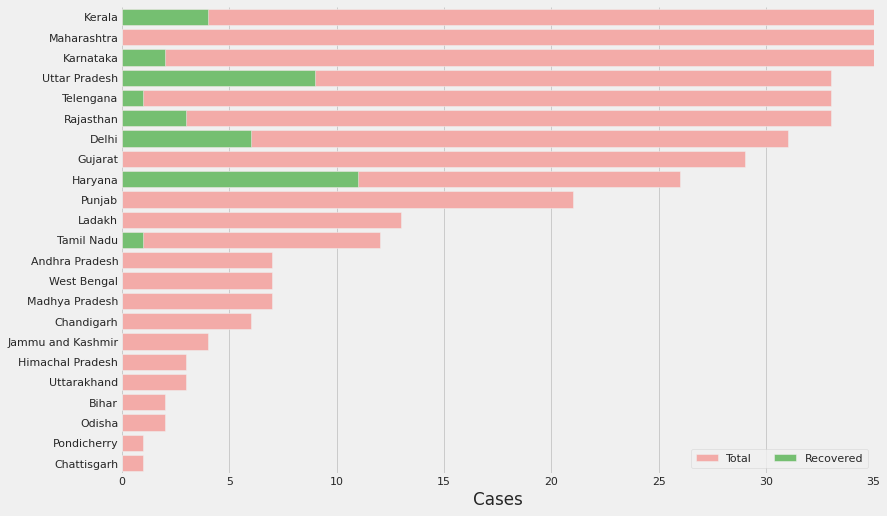

In [65]:
f, ax = plt.subplots(figsize=(12, 8))
data = df1[['Name of State / UT','Total cases','Cured/Discharged/Migrated','Deaths']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,
            label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured/Discharged/Migrated", y="Name of State / UT", data=data,
            label="Recovered", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",
       xlabel="Cases")
sns.despine(left=True, bottom=True)


In [66]:
# Rise in COVID-19 cases in India
dbd_India=df3
fig = go.Figure()

fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    mode='lines+markers',name='Total Cases'))

fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Recovered'], 
                mode='lines',name='Recovered'))
fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Active'], 
                mode='lines',name='Active'))
fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Deaths'], 
                mode='lines',name='Deaths'))
        
    
fig.update_layout(title_text='Trend of Coronavirus Cases in India(Cumulative cases)',plot_bgcolor='rgb(250, 242, 242)')

fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group',
             height=400)
fig.update_layout(title_text='New Coronavirus Cases in India per day',plot_bgcolor='rgb(250, 242, 242)')

fig.show()